In [8]:
import numpy as np
import pandas as pd
from energy_plot import *
from system import *
from stl_creator import *
from image_3d import *
import matplotlib.pyplot as plt
import sys

In [142]:
N = 60

VP = np.genfromtxt(f'vps_data/N{N}.txt', delimiter=', ')

In [143]:
solid_3d = txt_to_stl(VP)

In [144]:
solid_3d.save(f'stl_projects/N{N}.stl')

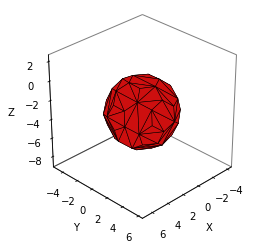

In [145]:
create_image(solid_3d, fcolor='#CD0F0F')
plt.savefig(f'solid_images/N{N}.png', dpi=600)
plt.show()

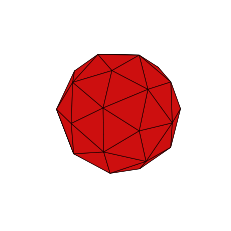

In [13]:
create_video(solid_3d, f'solid_gifs/N{N}.gif', fcolor='#CD0F0F')

In [14]:
D = distances_matrix(VP, dec=0)

#D = np.around(D*1.1, decimals=0)
np.set_printoptions(threshold=sys.maxsize)

print(D)

[[0. 2. 3. 2. 1. 3. 3. 3. 2. 3. 3. 3. 3. 3. 2. 1. 1. 3. 1. 3. 2. 1. 1. 2.
  3. 2. 2. 3. 2. 3. 2.]
 [2. 0. 1. 3. 2. 2. 2. 3. 2. 3. 3. 3. 2. 1. 2. 1. 3. 3. 3. 3. 3. 3. 2. 3.
  2. 1. 2. 1. 3. 3. 1.]
 [3. 1. 0. 3. 3. 1. 2. 2. 2. 3. 3. 3. 2. 1. 2. 2. 3. 2. 3. 2. 3. 3. 2. 3.
  1. 2. 3. 1. 3. 3. 2.]
 [2. 3. 3. 0. 2. 3. 2. 3. 3. 1. 2. 1. 3. 3. 2. 3. 1. 2. 2. 3. 1. 1. 3. 3.
  3. 2. 1. 3. 2. 2. 3.]
 [1. 2. 3. 2. 0. 3. 2. 3. 3. 2. 3. 2. 3. 3. 1. 1. 1. 3. 2. 3. 3. 2. 2. 3.
  3. 1. 1. 2. 3. 3. 2.]
 [3. 2. 1. 3. 3. 0. 2. 1. 2. 3. 2. 3. 1. 1. 3. 3. 3. 2. 3. 1. 3. 3. 3. 2.
  1. 3. 3. 2. 3. 2. 2.]
 [3. 2. 2. 2. 2. 2. 0. 3. 3. 2. 3. 1. 3. 3. 1. 3. 2. 1. 3. 2. 3. 3. 3. 3.
  1. 2. 2. 1. 3. 2. 3.]
 [3. 3. 2. 3. 3. 1. 3. 0. 2. 2. 1. 3. 1. 2. 3. 3. 3. 2. 2. 1. 2. 3. 3. 1.
  2. 3. 3. 3. 2. 1. 2.]
 [2. 2. 2. 3. 3. 2. 3. 2. 0. 3. 2. 3. 1. 1. 3. 2. 3. 3. 1. 3. 3. 2. 1. 1.
  3. 2. 3. 3. 2. 3. 1.]
 [3. 3. 3. 1. 2. 3. 2. 2. 3. 0. 2. 1. 3. 3. 2. 3. 2. 1. 3. 2. 1. 2. 3. 2.
  2. 3. 2. 3. 2. 1. 3.]
 [3. 3. 3. 2. 3. 2. 

In [ ]:
ALPHA = -0.0
BETA = -1
GAMMA = 5

H = hamiltonian(D, ALPHA, BETA, GAMMA, dec=1)

print(H)

In [ ]:
evals, evecs = np.linalg.eig(H)
evals = np.real(evals)
print(evals)

In [ ]:
plot_energy_levels(evals, dec=1, energ_unit='-β')
plt.savefig(f'energy_levels/N{N}.png', dpi=600)
# Show the plot
plt.show()

In [ ]:
solid_3d = txt_to_stl(VP)

In [ ]:
solid_3d.save(f'stl_projects/N{N}.stl')

In [ ]:
create_image(solid_3d, fcolor='#CD0F0F')
plt.show()

In [ ]:
create_video(solid_3d, f'solid_gifs/N{N}.gif', fcolor='#CD0F0F')